# Assignment 3

# Instruction

1. All the required dataset are attached with the file.
    (ufo.csv dataset for Question 1,
    u.user dataset for Question 2,
    Movie.csv dataset for Question 3)
2. Don’t plagiarize, Plagiarism would lead to straight zero
3. Clearly mention your NAME and ROLL NO#.
4. Late submissions are not allowed. Start Early.

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

## Question1

In [ ]:
# read ufo.csv into a DataFrame called 'ufo'
data = pd.read_csv('ufo.csv')

# print the head and the tail
print(data.head())
print(data.tail())
# examine the default index, data types, and shape of ufo dataframe
print(data.info())
print(data.shape)
print(data.index)

In [ ]:
# count the number of missing values in each column
d=data.isnull().sum()
print(d)
# count total number of null values in the dataframe
d=d.sum()
print("\ntotal number of null values in the dataframe are",d,'\n')
# print those rows which has null values
d = data[data.isna().any(axis=1)]
print(d)

In [ ]:
# fill null values, 
#if any column is numerical has null value than fill this column with mean of that column
columns=data.select_dtypes('number').columns
data[columns].apply(lambda col: col.fillna(col.mean()),axis=0)
#if any column is categorical than fill this column with most frequent value of that column
d = data.apply(lambda col : col.fillna(col.mode()[0]), axis=0)
d

In [ ]:
# calculate the most frequent value for each of the columns (in a single command)
print(data.mode(axis=0))

# what are the four most frequent colors reported?
print(data['Colors Reported'].value_counts()[:4])

# for reports in VA, what's the most frequent city?
print(data[data['State'] == 'VA']['City'].mode()[0])

# show only the UFO reports from Arlington, VA
print(data[(data['State'] == 'VA') & (data['City'] == 'Arlington')])

# show only the UFO reports in which the City is missing
print(data[data['City'].isna()])

# how many rows remain if you drop all rows with any missing values?
print(len(data.dropna(axis='index', how='any')))

# replace any spaces in the column names with an underscore
data.rename(columns = {'Colors Reported' : 'Colors_Reported'})
data.rename(columns = {'Shape Reported' : 'Shape_Reported'})

# create a new column called 'Location' that includes both City and State
# For example, the 'Location' for the first row would be 'Ithaca, NY'
data['Location'] = data['City'] + ', ' + data['State']

# writing generic code to replace spaces with underscores
# In other words, your code should not reference the specific column names
data.columns = data.columns.str.replace(' ', '_')

# convert datatype of column 'time'  to the datetime format
data.drop(data.tail(1).index, inplace=True)
data['Time'] =  pd.to_datetime(data['Time'])
print(data)



# Question 2

In [ ]:
#importing file
users = pd.read_table('u.user', sep='|', index_col='user_id')

Describe and show the dataframe

In [ ]:
# describe information of all columns
print(users.columns)
# describe information of all numeric columns only
print(users._get_numeric_data())
# describe information of all object columns only
print(users.dtypes[users.dtypes == 'object'])
# show first 10 rows of users dataframe
print(users.head(10))

detecting duplicate rows

In [ ]:
# check wheather a row is identical to a previous row
display(users.duplicated())
# count all duplicate rows in the dataframe
print(users.duplicated().sum())
# show only duplicate rows in the dataframe
d=users.duplicated()
d=users[d]
print(d)
# drop all duplicate rows in the dataframe
print(users.drop_duplicates())
# check a single specific column for duplicates occur or not
d = users.duplicated(subset=['age']).any()
print(d)
# check specify more than one column for finding duplicates
print(users[users.duplicated(subset=['age','zip_code'])])


In [ ]:
# display the 3 most frequent occupations in 'users'
print(users['occupation'].value_counts()[0:3].index.tolist())

# change the data type of a column name age from int to float
print(users['age'].astype(float))

# for each occupation, calculate the minimum and maximum ages
print(users.groupby('occupation')['age'].max())
print(users.groupby('occupation')['age'].min())


In [ ]:
# for each occupation in 'users', count the number of occurrences
d=users['occupation'].value_counts()
print(d)
# plot barchar of upper out w.r.t each occupation 
print(d.plot.bar())

In [ ]:
# for each occupation, calculate the mean age
d= users.groupby('occupation')['age'].mean()
print(d)
# plot pie chart of the upper output
print(d.plot.bar())

In [ ]:
# for each combination of occupation and gender, calculate the mean age
gender = users.groupby(['occupation','gender'])['age'].mean()
display(gender.to_frame())
# plot barchart of upper out w.r.t each occupation and gender 
plt.style.use('fivethirtyeight')
gender.plot(kind='bar', figsize = (16,5))
plt.ylabel('Mean Ages')
plt.show()

In [ ]:
# sort 'users' by 'occupation' and then by 'age' (in a single command)
print(users.sort_values(['occupation', 'age']))


In [ ]:
# map existing values to a different set of values
# like in column 'is_male', convert F value to 0 and M to 1 with pandas
users['is_male'] = users.gender.map({'F':0, 'M':1})

# Question 3

In [ ]:
# read movie.csv into a DataFrame called 'movie'
data = pd.read_csv('movie.csv')
# describe the dataframe
print(data.describe())
#rename the column Runtime (Minutes) with Runtime_Minutes, and Revenue (Millions) with Revenue_Millions 
d=data.rename(columns={"Runtime (Minutes)":"Runtime_Minutes"
                    ,"Revenue (Millions)":"Revenue_Millions"})
print(d)

In [ ]:
# show if any column has null value
d=data.columns[data.isna().any()].tolist()
print(d)
# count total number of null vlaues in the dataframe
d=data.isnull().sum().sum()
print(d)
# print those rows which has null values
d=data[data.isna().any(axis=1)]
print(d)

In [ ]:
# fill null values, 
#if column is numerical than fill with means (if there is no numerical missing value in 
#data frame then don't code in this)
data.fillna(data.mean(), inplace =True)

#if column is categorical than fill with most frequent value (if there is no categorical missing value in 
#data frame then don't code in this)
d = data.apply(lambda col : col.fillna(col.mode()[0]), axis=0)
d

In [ ]:
# plot histogram of the column name year in movie dataframe, which shows how many movies release in a year.

fig,ax=plt.subplots(figsize=(8,6))
data['Year'].hist()
fig.show()

In [ ]:
# print the movie detail with title 'Grumpier Old Men'.
d= data[data['Title']=='Grumpier Old Men']
d

In [ ]:
# show those movies which are released after 1995-01-01
d = data[data['Year']>1995]
d

In [ ]:
# sort the movie DataFrame in decending order based on release_date
d = data.sort_values(["Year"], ascending = (False))
print(d)


In [ ]:
# for each year, display the total number of movie with specific gerne for example Action=1000,adventure=400
d = data.groupby('Genre')['Genre'].count()
print(d)
# plot histogram the upper calculated total count
fig,ax= plt.subplots(figsize=(10,7))
fig= d.hist()
plt.show()

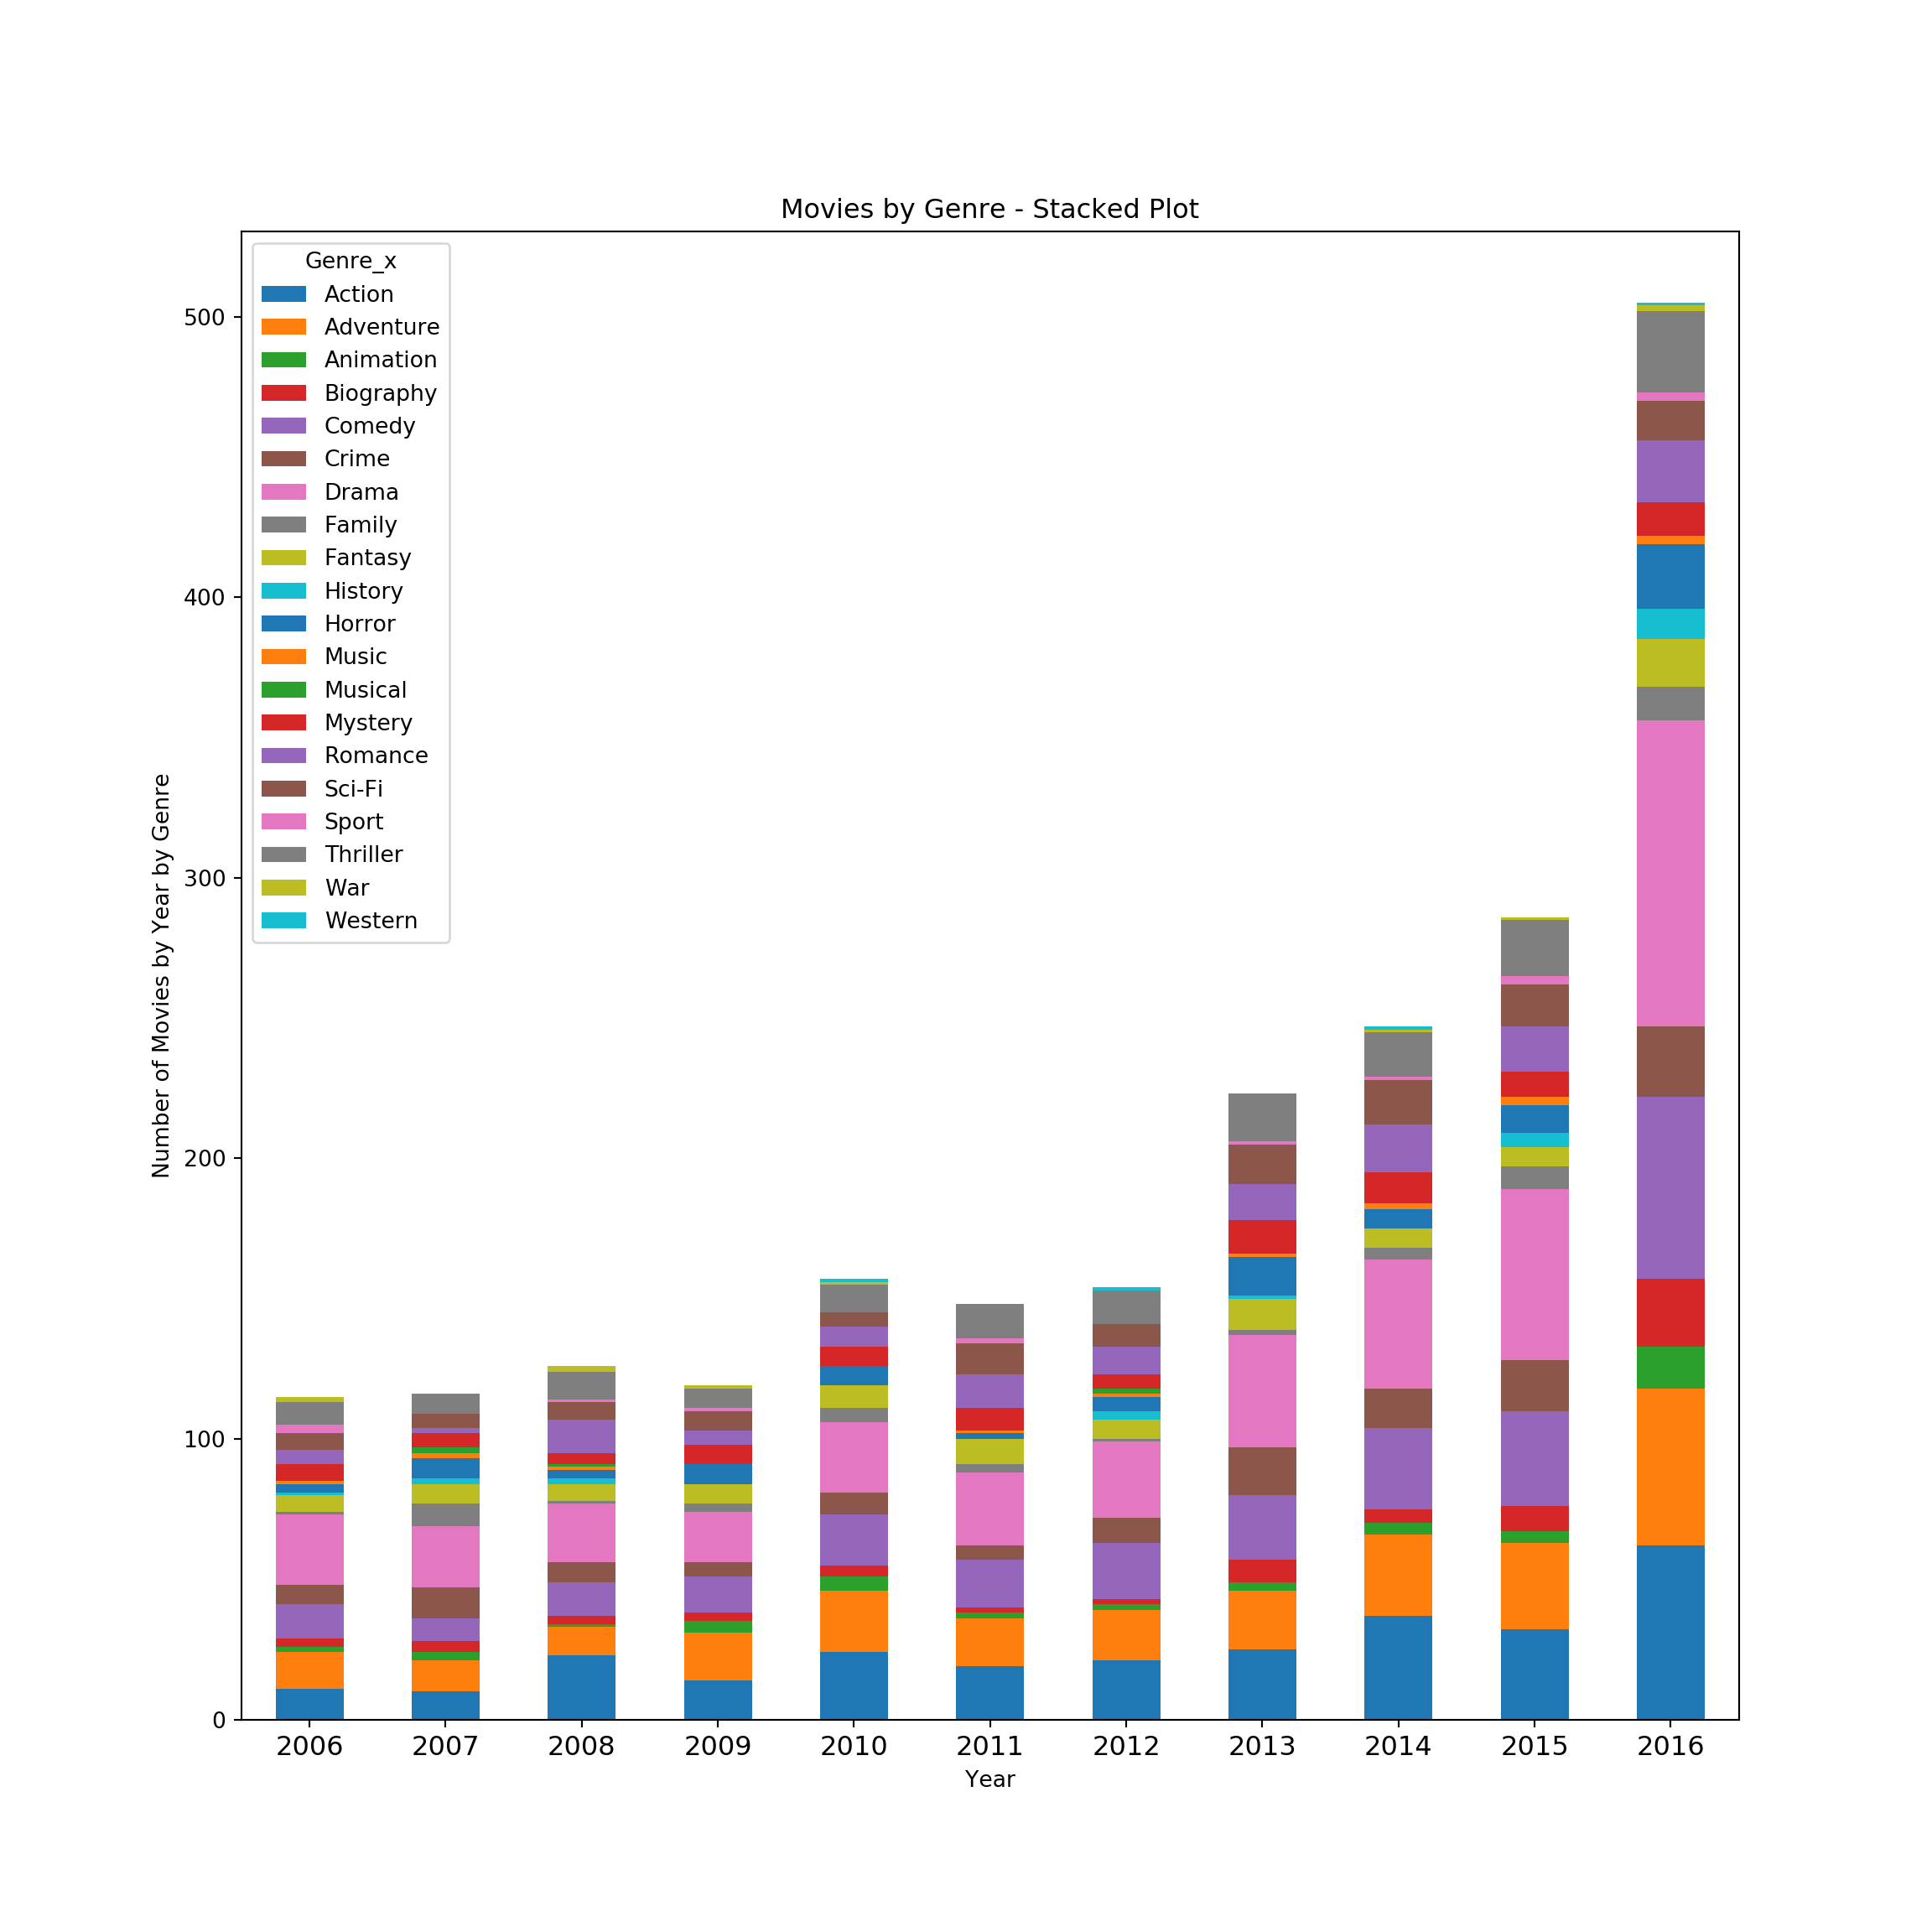

In [ ]:
# filter the movies with specific gerne
# like show only those movies which are selected Action gerne
d= data[data['Genre']=='Action']
d

In [ ]:
# for each Director, display all the movies with detail.
L_D=data['Director'].unique().tolist()
for director in L_D:
    df=data[data['Director']==director]
    print(" "+director+" ")
    print(df.head())

# count the movies and plot barchart top 10 director's movies.
d = data.groupby('Director')['Director'].count().sort_values(ascending=False).head(10)
print(d)
fig,ax=plt.subplots(figsize=(8,6))
d.plot.bar()
plt.show()

In [ ]:
# for each Actor, display all the movies with detail.
actors = set()
for act in data['Actors']:
    for actor in act.split(','):
        actors.add(actor)
actors = list(actors)
    
    
    
new_actor = dict()
for actor in actors:
    
    act = data[[True if actor in g.split(',') else False for g in data['Actors']]]
    new_actor[actor] = len(act)
new_actor = sorted(new_actor.items(), key=lambda x:x[1], reverse=True)
new_actor = new_actor[:10]
hero = []
number = []
for val in new_actor:
    
    hero.append(val[0])
    number.append(val[1])
# count the movies and visualize the top 10 actor's movies in plot
plt.barh(hero, number)
plt.xlabel('Number of movies')

plt.ylabel('Actors')
plt.title('Top 10 Actors')
plt.show()

In [ ]:

# filter the movies with specific actor's name
data[data['Actors'].str.contains('Logan Marshall-Green')]

In [ ]:
# List of top 5 Actor per year who has highest rating from the year 2010 - 2017

# plot horizontal barcahrt of upper output


In [ ]:
# show count all movies which has rating more 3.0 and less than 7.0
d= data[(data['Rating']>=3.0) & (data['Rating']<=7.0)]
print(d)
# plot vertical barchart of upper output, movies w.r.t rating
print(d.plot.bar())

In [ ]:
#  plot scatter between voting and rating 
d=data.plot(x='Votes', y='Rating', style='o')
d

In [ ]:
# print top 10 movies which has higher revenue
sort_revenue= data.sort_values(['Revenue (Millions)'], ascending=False)
print(sort_revenue.head(10))

# plot horizontal barchart of upper output
print(sort_revenue.plot.barh())

In [ ]:
# top 10 movies which has highest number of voting greater than 1000000
sortvotes= data.sort_values(['Votes'], ascending=False)
v= sortvotes.query('(Votes > 1000000)')
print('number of movies voted more than 1 million :')
d=v
print(len(v))
# plot horizontal barchart of upper output 
display(d.plot.barh())

In [ ]:
# print top 10 directors, which has generated highest "average ravenue".
out=data.sort_values('Revenue (Millions)',ascending=False).head(10)
print(out.Director)
# plot horizontal bar chart of revenue w.r.t director 
out = pd.DataFrame(out,columns=['Director','Revenue (Millions)'])
out.plot(x ='Director', y='Revenue (Millions)', kind = 'barh')
plt.show()

In [ ]:
# calculate total and average revenue of each gerne 

# prin hitogram of upper output, like showing below

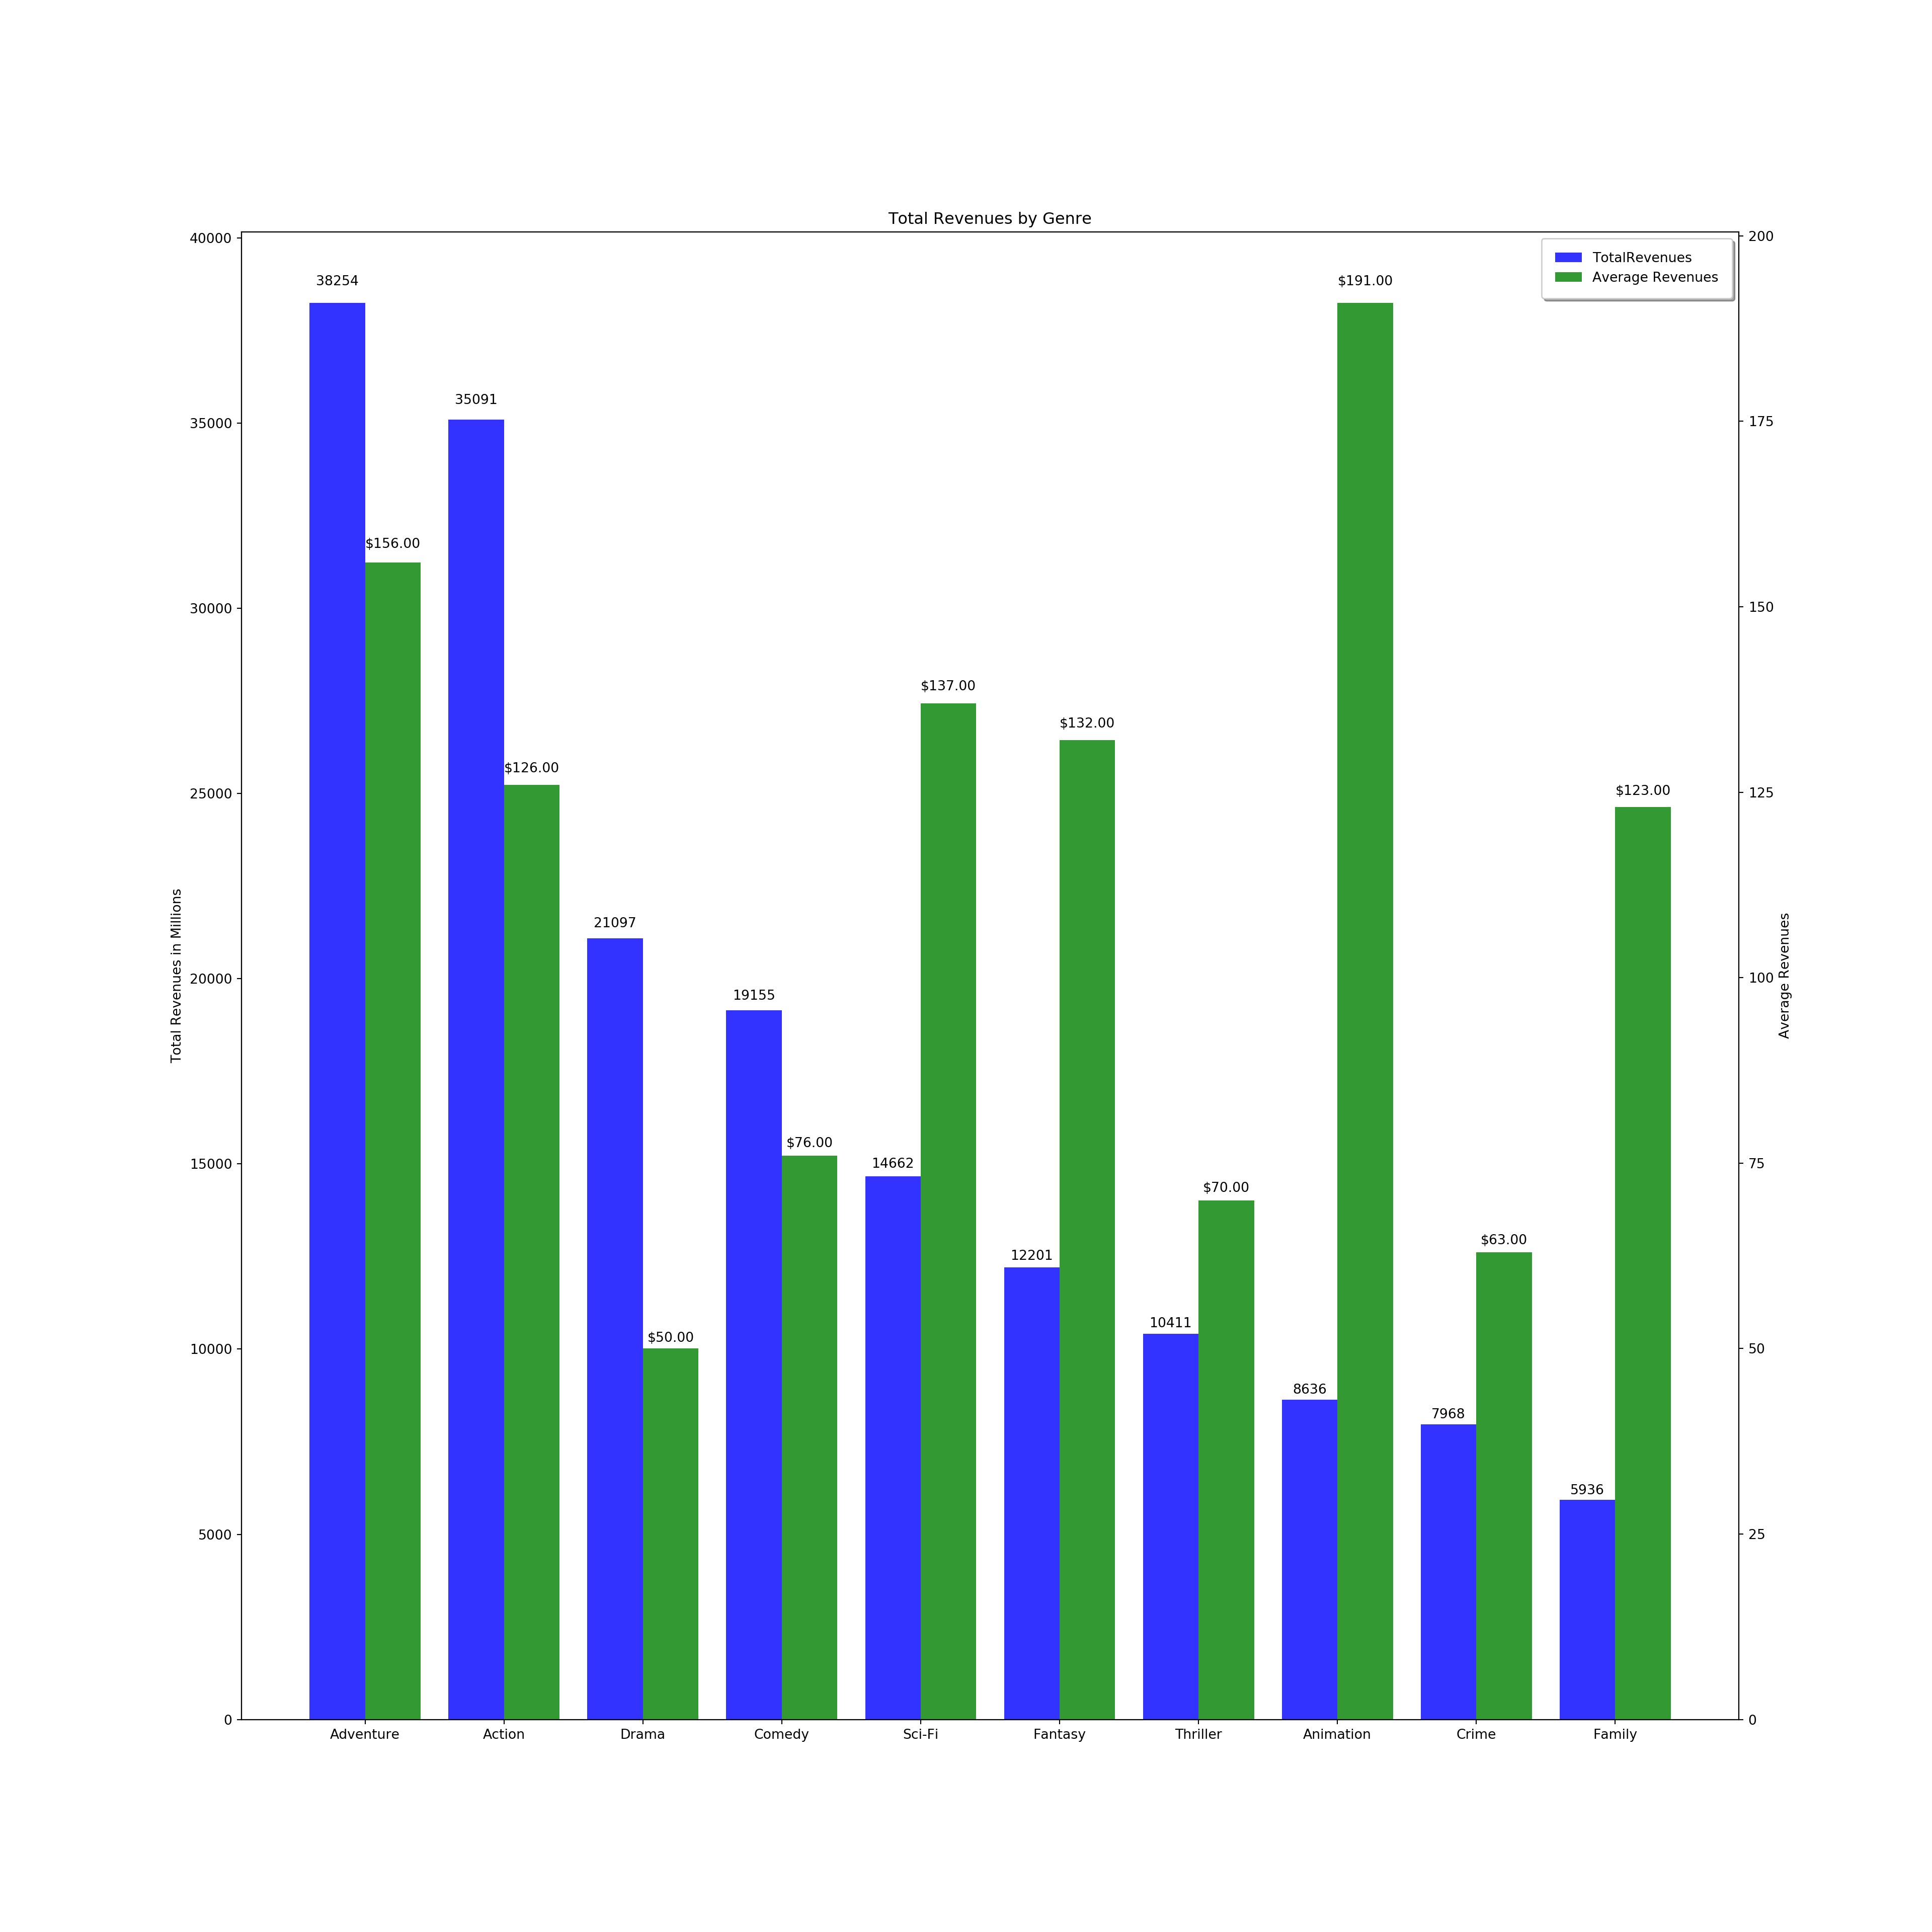

In [ ]:
# Exploratory yearly analysis with dimensions on genres, revenue, rating
# like in 2010, each gerne movie generated average revenue and got this average rating

# plot barchart of gerne w.r.t to revenue and average


In [ ]:
# visualize metascore column with boxplot

# and explain what information you got from